In [3]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [4]:

plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =14
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 16 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 16 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 16 # Axes labels

In [5]:
Data_Barometry=pd.read_excel('Web_of_SCience_Queries.xlsx', sheet_name='Barometry_Python')
Data_FIs=pd.read_excel('Web_of_SCience_Queries.xlsx', sheet_name='FI_python_Formatted')
Data_MIs=pd.read_excel('Web_of_SCience_Queries.xlsx', sheet_name='MI_Python_Formatted')



In [6]:
bins_lin_Bar=np.linspace(np.min(Data_Barometry['Publication Year']), np.max(Data_Barometry['Publication Year']),
                    np.max(Data_Barometry['Publication Year'])-np.min(Data_Barometry['Publication Year'])+1
                    )
bins_lin_FIs=np.linspace(np.min(Data_FIs['Publication Year']), np.max(Data_FIs['Publication Year']),
                    np.max(Data_FIs['Publication Year'])-np.min(Data_FIs['Publication Year'])+1
                    )
bins_lin_MIs=np.linspace(np.min(Data_MIs['Publication Year']), np.max(Data_MIs['Publication Year']),
                    np.max(Data_MIs['Publication Year'])-np.min(Data_MIs['Publication Year'])+1
                    )

In [7]:
sum(Data_MIs['Publication Year']==2020)

7

## Loop over dates

In [8]:
Data_MIs.iloc[:, 21]
Dates=np.linspace(1965, 2021, (2021-1965)+1)
Non_Cum_Sum_Cite_MI=np.zeros(2021-1965+1)
Cum_Sum_Cite_MI=np.zeros(2021-1965+1)
Non_Cum_Sum_Cite_FI=np.zeros(2021-1965+1)
Cum_Sum_Cite_FI=np.zeros(2021-1965+1)
Non_Cum_Sum_Cite_Bar=np.zeros(2021-1965+1)
Cum_Sum_Cite_Bar=np.zeros(2021-1965+1)

Non_Cum_Sum_Study_MI=np.zeros(2021-1965+1)
Cum_Sum_Study_MI=np.zeros(2021-1965+1)
Non_Cum_Sum_Study_FI=np.zeros(2021-1965+1)
Cum_Sum_Study_FI=np.zeros(2021-1965+1)
Non_Cum_Sum_Study_Bar=np.zeros(2021-1965+1)
Cum_Sum_Study_Bar=np.zeros(2021-1965+1)

for i in range(0, (2022-1965)):
    Non_Cum_Sum_Cite_MI[i]=np.sum(Data_MIs.iloc[:, i+21])
    Non_Cum_Sum_Cite_FI[i]=np.sum(Data_FIs.iloc[:, i+21])
    Non_Cum_Sum_Cite_Bar[i]=np.sum(Data_Barometry.iloc[:, i+21])  
    Non_Cum_Sum_Study_MI[i]=sum(Data_MIs['Publication Year']==(i+1965))
    Non_Cum_Sum_Study_FI[i]=sum(Data_FIs['Publication Year']==(i+1965))
    Non_Cum_Sum_Study_Bar[i]=sum(Data_Barometry['Publication Year']==(i+1965)) 
    
    if i==0:
        Cum_Sum_Cite_MI[i]=Non_Cum_Sum_Cite_MI[i]
        Cum_Sum_Cite_FI[i]=Non_Cum_Sum_Cite_FI[i]
        Cum_Sum_Cite_Bar[i]=Non_Cum_Sum_Cite_Bar[i]
        Cum_Sum_Study_MI[i]=Non_Cum_Sum_Study_MI[i]
        Cum_Sum_Study_FI[i]=Non_Cum_Sum_Study_FI[i]
        Cum_Sum_Study_Bar[i]=Non_Cum_Sum_Study_Bar[i]        
    if i>0:
        Cum_Sum_Cite_MI[i]=Cum_Sum_Cite_MI[i-1]+Non_Cum_Sum_Cite_MI[i]
        Cum_Sum_Cite_FI[i]=Cum_Sum_Cite_FI[i-1]+Non_Cum_Sum_Cite_FI[i]
        Cum_Sum_Cite_Bar[i]=Cum_Sum_Cite_Bar[i-1]+Non_Cum_Sum_Cite_Bar[i]  
    
        Cum_Sum_Study_MI[i]=Cum_Sum_Study_MI[i-1]+Non_Cum_Sum_Study_MI[i]
        Cum_Sum_Study_FI[i]=Cum_Sum_Study_FI[i-1]+Non_Cum_Sum_Study_FI[i]
        Cum_Sum_Study_Bar[i]=Cum_Sum_Study_Bar[i-1]+Non_Cum_Sum_Study_Bar[i]

In [30]:
Cum_Sum_Study_MI

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   3.,   3.,   4.,
         7.,   8.,  10.,  13.,  14.,  17.,  18.,  25.,  27.,  30.,  31.,
        35.,  40.,  41.,  48.,  58.,  60.,  68.,  78.,  88., 103., 110.,
       117., 127.])

(1995.0, 2021.0)

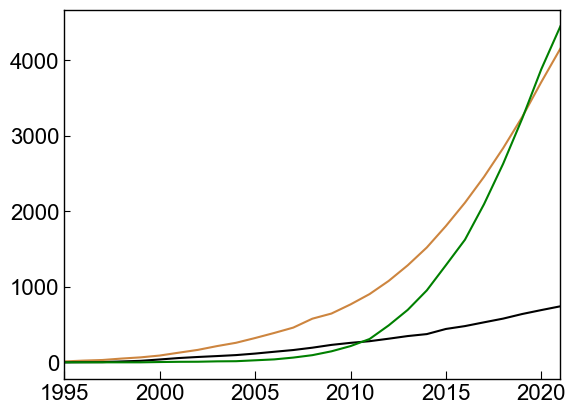

In [9]:
plt.plot(Dates, Cum_Sum_Cite_MI, '-', color='peru')
plt.plot(Dates, Cum_Sum_Cite_FI, '-k')
plt.plot(Dates, Cum_Sum_Cite_Bar, '-g')
plt.xlim([1995, 2021])

(0.0, 120.0)

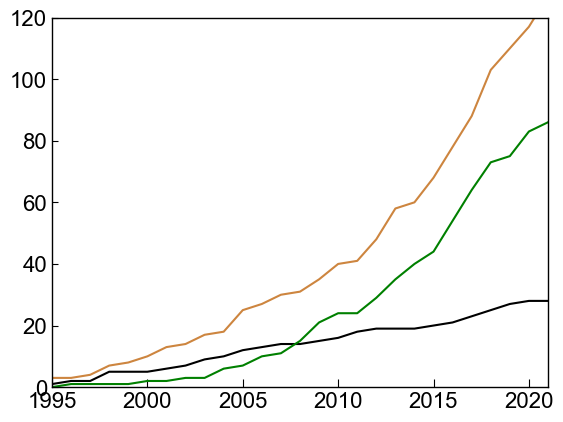

In [10]:
plt.plot(Dates, Cum_Sum_Study_MI, '-', color='peru')
plt.plot(Dates, Cum_Sum_Study_FI, '-k')
plt.plot(Dates, Cum_Sum_Study_Bar, '-g')
plt.xlim([1995, 2021])
plt.ylim([0, 120])

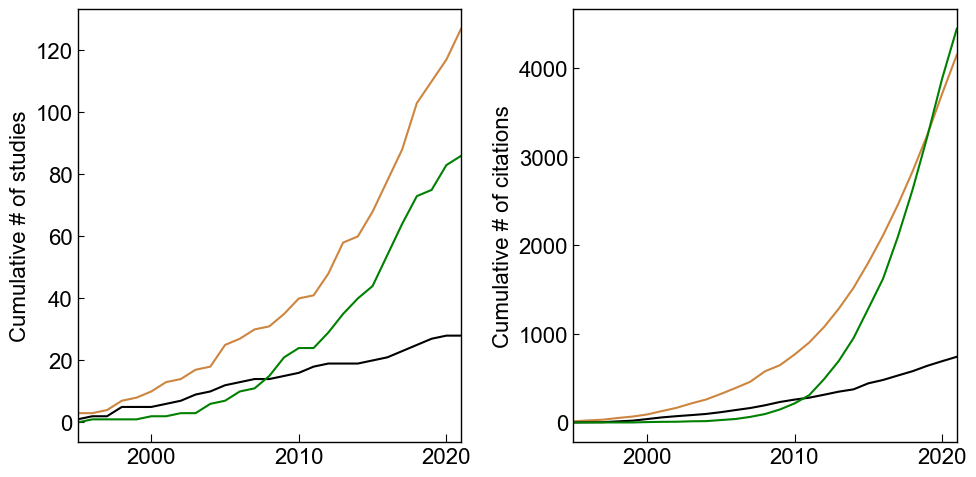

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=True)
ax1.plot(Dates, Cum_Sum_Study_MI, '-', color='peru')
ax1.plot(Dates, Cum_Sum_Study_FI, '-k')
ax1.plot(Dates, Cum_Sum_Study_Bar, '-g')

ax2.plot(Dates, Cum_Sum_Cite_MI, '-', color='peru')
ax2.plot(Dates, Cum_Sum_Cite_FI, '-k')
ax2.plot(Dates, Cum_Sum_Cite_Bar, '-g')
plt.xlim([1995, 2021])
ax1.set_ylabel('Cumulative # of studies')
ax2.set_ylabel('Cumulative # of citations')

fig.tight_layout()

In [12]:
bins_lin_MIs

array([1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021.])

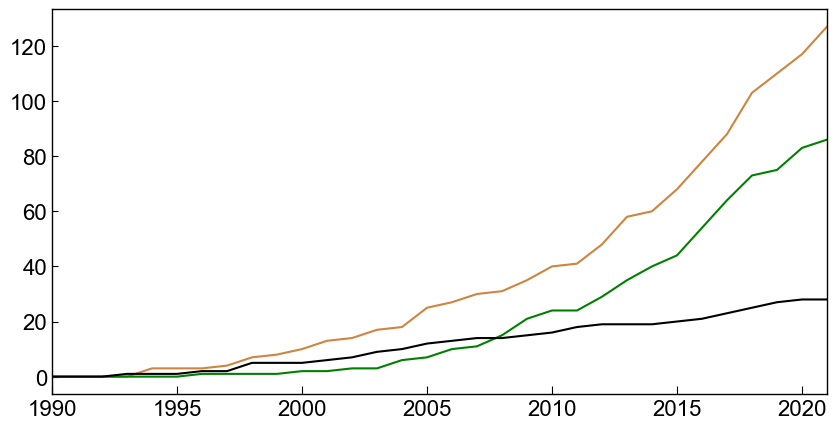

In [13]:
fig, (ax1) = plt.subplots(figsize=(10,5))

# ax1.hist(Data_Barometry['Publication Year']+0.375, bins=bins_lin_Bar+0.5+0.375, rwidth=0.25,  fc='green', label='Min-Melt')
# ax1.hist(Data_FIs['Publication Year']+0.125, bins=bins_lin_FIs+0.5+0.125, rwidth=0.25,  fc='k', label='FIs')
# ax1.hist(Data_MIs['Publication Year']+0.625, bins=bins_lin_MIs+0.5+0.625, rwidth=0.25,  fc='peru', label='MIs', alpha=0.8)
ax1.plot(Dates, Cum_Sum_Study_MI, '-', color='peru', label='Melt inclusions')
ax1.plot(Dates, Cum_Sum_Study_Bar, '-g', label='Mineral barometry')
ax1.plot(Dates, Cum_Sum_Study_FI, '-k', label='Fluid inclusions')

ax1.set_xlim([1990, 2021])
#ax1.legend()
fig.savefig('Smaller_WOS.png', dpi=200)

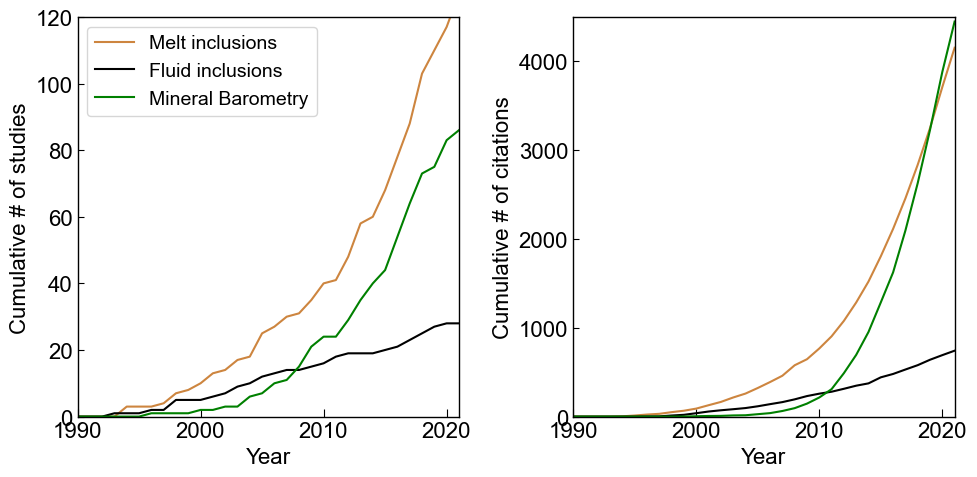

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# ax1.hist(Data_Barometry['Publication Year']+0.375, bins=bins_lin_Bar+0.5+0.375, rwidth=0.25,  fc='green', label='Min-Melt')
# ax1.hist(Data_FIs['Publication Year']+0.125, bins=bins_lin_FIs+0.5+0.125, rwidth=0.25,  fc='k', label='FIs')
# ax1.hist(Data_MIs['Publication Year']+0.625, bins=bins_lin_MIs+0.5+0.625, rwidth=0.25,  fc='peru', label='MIs', alpha=0.8)
ax1.plot(Dates, Cum_Sum_Study_MI, '-', color='peru', label='Melt inclusions')
ax1.plot(Dates, Cum_Sum_Study_FI, '-k', label='Fluid inclusions')
ax1.plot(Dates, Cum_Sum_Study_Bar, '-g', label='Mineral Barometry')

ax2.plot(Dates, Cum_Sum_Cite_MI, '-', color='peru')
ax2.plot(Dates, Cum_Sum_Cite_FI, '-k')
ax2.plot(Dates, Cum_Sum_Cite_Bar, '-g')


ax1.set_ylabel('Cumulative # of studies')
ax2.set_ylabel('Cumulative # of citations')

ax1.set_xlabel('Year')
ax2.set_xlabel('Year')

ax1.set_ylim([0, 120])
ax2.set_ylim([0, 4500])
ax1.set_xlim([1990, 2021])
ax2.set_xlim([1990, 2021])
ax1.legend()
plt.tight_layout()
fig.savefig('Web_of_Science.png', dpi=300)

## Errors

In [15]:
import CoolProp.CoolProp as CP

CalcP=CP.PropsSI('P', 'D', 0.42*1000, 'T', 800+273.15, 'CO2')*10**(-8)
CalcP

Temp=np.random.normal(1200+273.15, 30, 1000)

Density_05=np.random.normal(0.5*1000, 0.02*1000, 1000)
Density_02=np.random.normal(0.2*1000, 0.02*1000, 1000)
Density_01=np.random.normal(0.1*1000, 0.02*1000, 1000)
Density_08=np.random.normal(0.8*1000, 0.02*1000, 1000)

CalcP_MC_05=CP.PropsSI('P', 'D', Density_05, 'T', Temp, 'CO2')*10**(-8)
CalcP_MC_02=CP.PropsSI('P', 'D', Density_02, 'T', Temp, 'CO2')*10**(-8)
CalcP_MC_01=CP.PropsSI('P', 'D', Density_01, 'T', Temp, 'CO2')*10**(-8)

CalcP_MC_08=CP.PropsSI('P', 'D', Density_08, 'T', Temp, 'CO2')*10**(-8)
CalcP_MC_05_sd=np.std(CalcP_MC_05)
CalcP_MC_02_sd=np.std(CalcP_MC_02)
CalcP_MC_01_sd=np.std(CalcP_MC_01)
CalcP_MC_08_sd=np.std(CalcP_MC_08)

(array([  3.,  20.,  52., 140., 189., 262., 195.,  91.,  37.,  11.]),
 array([1375.81418882, 1393.87179214, 1411.92939545, 1429.98699877,
        1448.04460208, 1466.1022054 , 1484.15980871, 1502.21741203,
        1520.27501534, 1538.33261866, 1556.39022197]),
 <BarContainer object of 10 artists>)

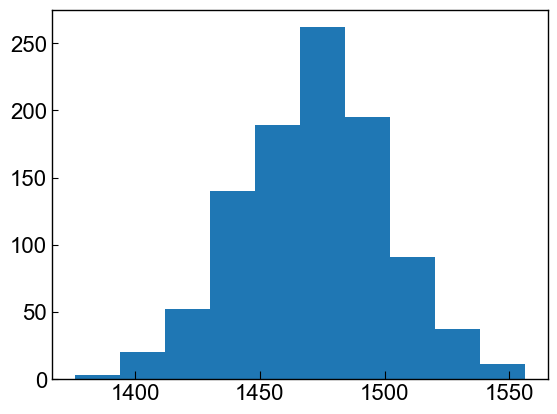

In [16]:
plt.hist(Temp)

In [17]:
f8_depth=np.array([
0.360000000000000,
0.490000000000000,
0.660000000000000,
0.770000000000000,
0.360000000000000,
0.660000000000000,
0.520000000000000,
0.280000000000000,
0.310000000000000,
0.490000000000000,
0.970000000000000,
0.790000000000000,
0.790000000000000,
0.570000000000000,
0.840000000000000,
1.47000000000000,
0.730000000000000,
0.700000000000000,
0.920000000000000,
0.710000000000000,
0.880000000000000,
0.820000000000000,
0.920000000000000,
0.320000000000000,
0.690000000000000,
2.07000000000000,
0.240000000000000])
F8_err=np.array([0.190000000000000,
0.430000000000000,
0.280000000000000,
0.370000000000000,
0.290000000000000,
0.390000000000000,
0.490000000000000,
0.230000000000000,
0.230000000000000,
0.220000000000000,
0.470000000000000,
0.720000000000000,
0.560000000000000,
0.170000000000000,
0.490000000000000,
0.840000000000000,
0.410000000000000,
0.320000000000000,
0.560000000000000,
0.300000000000000,
0.330000000000000,
0.370000000000000,
0.390000000000000,
0.0800000000000000,
0.490000000000000,
0.720000000000000,
0.120000000000000])


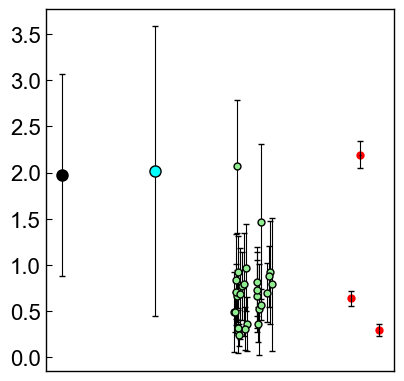

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4.5,4.7), sharey=True)
ax1.errorbar(0,
             1.9706891851560804,
             yerr=1.0936611113123715,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k',  capsize=2)
ax1.plot(0,
             1.9706891851560804,
             'ok', mfc='k', ms=8)

ax1.errorbar(1,
             2.017065765896709,
             yerr=1.5744390920895586,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k', capsize=2, zorder=0)
ax1.plot(1,
             2.017065765896709,
             'ok', mfc='cyan', ms=8)

for i in range(0, len(f8_depth)):
    rand=np.random.normal(0, 0.1, 1)
    ax1.plot(f8_depth[i]*0+2+rand, f8_depth[i], 'ok', mfc='lightgreen', ms=5)
    ax1.errorbar(f8_depth[i]*0+2+rand,
             f8_depth[i],
             yerr=F8_err[i],
             fmt='.', ecolor='k', elinewidth=0.8, mfc='red', ms=1, mec='k', capsize=2, zorder=0)
 

# plt.plot(2,
#              np.mean(CalcP_MC_08),
#              'ok')
# plt.errorbar(2,
#              np.mean(CalcP_MC_08),
#              yerr=np.std(CalcP_MC_08),
#              fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k')
ax1.plot(3.2,
             np.mean(CalcP_MC_05),
             'o', mec='None', mfc='red', ms=6, zorder=0)
ax1.errorbar(3.2,
             np.mean(CalcP_MC_05),
             yerr=np.std(CalcP_MC_05),
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k', capsize=2)

ax1.plot(3.1,
             np.mean(CalcP_MC_02),
              'o', mec='None', mfc='red', ms=6, zorder=0)
ax1.errorbar(3.1,
             np.mean(CalcP_MC_02),
             yerr=np.std(CalcP_MC_02),
             fmt='.', ecolor='k', elinewidth=0.8, mfc='yellow', ms=0.5, mec='None', capsize=2)
ax1.plot(3.4,
             np.mean(CalcP_MC_01),
             'o', mec='None', mfc='red', ms=6, zorder=0)
ax1.errorbar(3.4,
             np.mean(CalcP_MC_01),
             yerr=np.std(CalcP_MC_01),
             fmt='.', ecolor='k', elinewidth=0.8, mfc='red', ms=1, mec='None', capsize=2)
   
ax1.set_xticks([])
fig.savefig('Different_Errors.png', dpi=300)

## Pressure vs depth

## Loading in other equation and state from Sterner and Pitzer (1994)


In [19]:
SP=pd.read_excel('Sterner_Pitzer (1994) EOS.xlsx')

In [20]:
P=np.linspace(100, 2000*10**6, 100)
Psmall=np.linspace(0, 100, 100)
P_combo=np.concatenate((Psmall, P))

In [21]:
CalcD_P=CP.PropsSI('D', 'P',5, 'T', 1200, 'CO2')
CalcD_P

2.2054716942098072e-05

In [22]:
rho=2700
P_axis_min=0
P_axis_max=20
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)

C:\Users\penny\AppData\Local\Temp\ipykernel_8520\2829470469.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax4.plot(SP['T_1100']/100, SP['rho'], 'ok', color='darkred')


Text(0.5, 0, 'Pressure (kbar)')

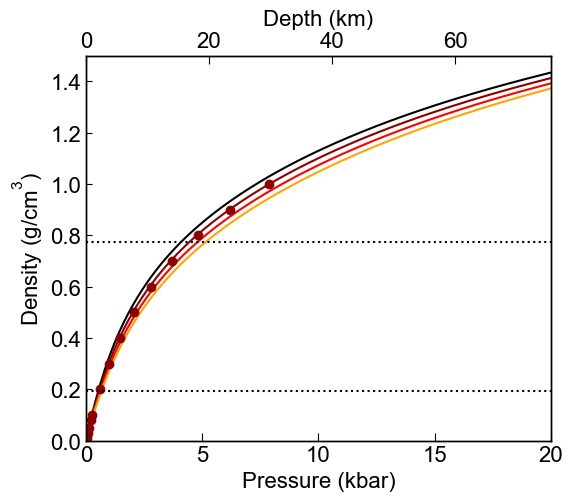

In [23]:
fig, (ax4) = plt.subplots(1, 1, figsize=(6,5))


CalcD_P_1300=CP.PropsSI('D', 'P', P_combo, 'T', 1300+273.15, 'CO2')
CalcD_P_1200=CP.PropsSI('D', 'P', P_combo, 'T', 1200+273.15, 'CO2')
CalcD_P_1100=CP.PropsSI('D', 'P', P_combo, 'T', 1100+273.15, 'CO2')
CalcD_P_1000=CP.PropsSI('D', 'P', P_combo, 'T', 1000+273.15, 'CO2')

ax5 = ax4.twiny()
ax4.plot(P_combo*10**(-8), CalcD_P_1000/1000, '-', color='black')
ax4.plot(P_combo*10**(-8), CalcD_P_1100/1000, '-', color='darkred')
ax4.plot(P_combo*10**(-8), CalcD_P_1200/1000, '-', color='red')
ax4.plot(P_combo*10**(-8), CalcD_P_1300/1000, '-', color='orange')

ax4.plot(SP['T_1100']/100, SP['rho'], 'ok', color='darkred') 

# Charlotts calculations At 20C: V=0.194 L=0.773
ax4.plot( [0, 20], [0.194, 0.194], ':k')
ax4.plot([0, 20],[0.773, 0.773],  ':k')
ax4.set_xlim([P_axis_min, P_axis_max])
ax4.set_ylim([0, 1.5])

ax5.set_xlim([D_axis_min, D_axis_max])
ax4.set_ylabel('Density (g/cm$^{3}$)')
ax5.set_xlabel('Depth (km)')
ax4.set_xlabel('Pressure (kbar)')

## Polyfit span and wanger vs. empiricla

C:\Users\penny\AppData\Local\Temp\ipykernel_8520\1748472042.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(SW['T_1100'], SW['rho'], 'ok', color='darkred')


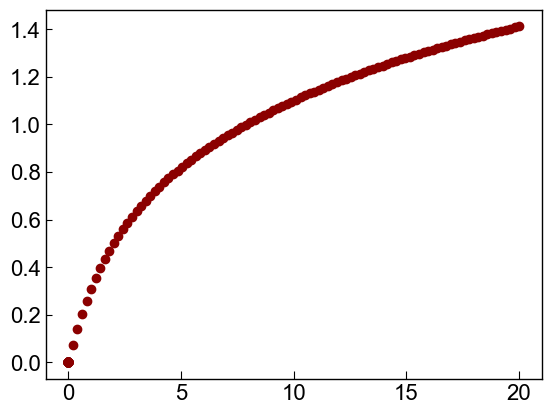

In [24]:
SW=pd.DataFrame(data={'T_1100': P_combo*10**(-8),
                      'rho': CalcD_P_1100/1000})
Pf_SW96 = np.poly1d(np.polyfit(SW['T_1100'].T.iloc[0:], 
                          SW['rho'].T.iloc[0:],
                          4))


Px_SW96  = np.linspace(0, 8, 101)
Py_SW96  = Pf_SW96 (Px_SW96 )
plt.plot(SW['T_1100'], SW['rho'], 'ok', color='darkred') 
plt.plot(Px_SW96, Py_SW96, '-r')

C:\Users\penny\AppData\Local\Temp\ipykernel_8520\2376647611.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(SP['T_1100']/100, SP['rho'], 'ok', color='darkred')


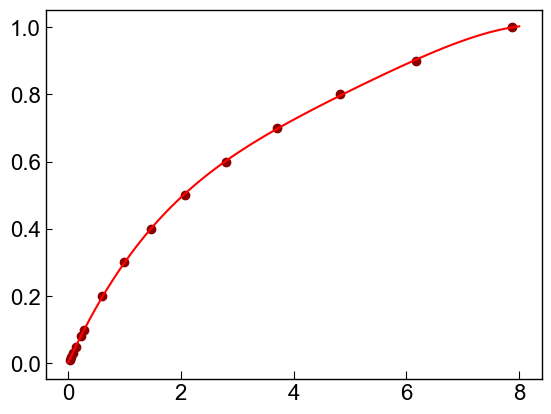

In [25]:
Pf_SP94 = np.poly1d(np.polyfit(0.01*SP['T_1100'].T.iloc[0:], 
                          SP['rho'].T.iloc[0:],
                          4))


Px_SP94 = np.linspace(0, 8, 101)
Py_SP94 = Pf_SP94(Px_SP94)
plt.plot(SP['T_1100']/100, SP['rho'], 'ok', color='darkred') 
plt.plot(Px_SP94, Py_SP94, '-r')

## Direct comparison - 

In [26]:
testSW=CP.PropsSI('P', 'D', 0.8*1000, 'T', 1150+273.15, 'CO2')
testSW*10**(-6)

495.6375371392693

In [27]:
100-100*testSW*10**(-6)/500.8

1.0308432229893612

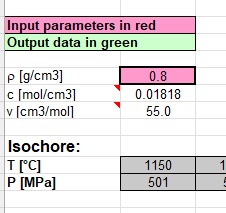

Text(0.5, 0, 'Pressure (kbar)')

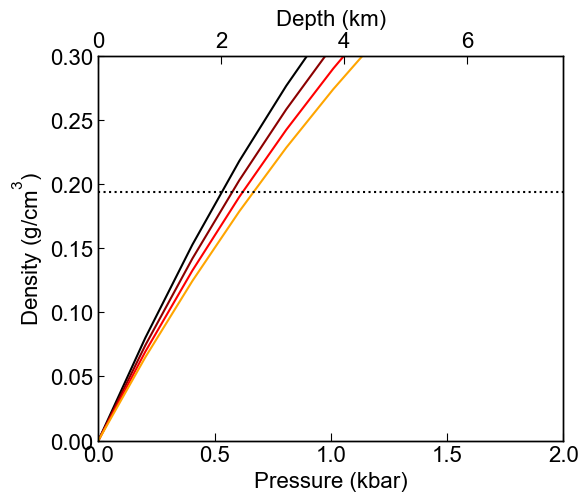

In [28]:
fig, (ax4) = plt.subplots(1, 1, figsize=(6,5))
ax5 = ax4.twiny()
CalcD_P_1300=CP.PropsSI('D', 'P', P_combo, 'T', 1300+273.15, 'CO2')
CalcD_P_1200=CP.PropsSI('D', 'P', P_combo, 'T', 1200+273.15, 'CO2')
CalcD_P_1100=CP.PropsSI('D', 'P', P_combo, 'T', 1100+273.15, 'CO2')
CalcD_P_1000=CP.PropsSI('D', 'P', P_combo, 'T', 1000+273.15, 'CO2')

ax4.plot(P_combo*10**(-8), CalcD_P_1000/1000, '-', color='black')
ax4.plot(P_combo*10**(-8), CalcD_P_1100/1000, '-', color='darkred')
ax4.plot(P_combo*10**(-8), CalcD_P_1200/1000, '-', color='red')
ax4.plot(P_combo*10**(-8), CalcD_P_1300/1000, '-', color='orange')

# Charlotts calculations At 20C: V=0.194 L=0.773
ax4.plot( [0, 20], [0.194, 0.194], ':k')
ax4.plot([0, 20],[0.773, 0.773],  ':k')
ax4.set_xlim([P_axis_min, P_axis_max/10])
ax4.set_ylim([0, 1.5/5])

ax5.set_xlim([D_axis_min, D_axis_max/10])
ax4.set_ylabel('Density (g/cm$^{3}$)')
ax5.set_xlabel('Depth (km)')
ax4.set_xlabel('Pressure (kbar)')

## Combined figure

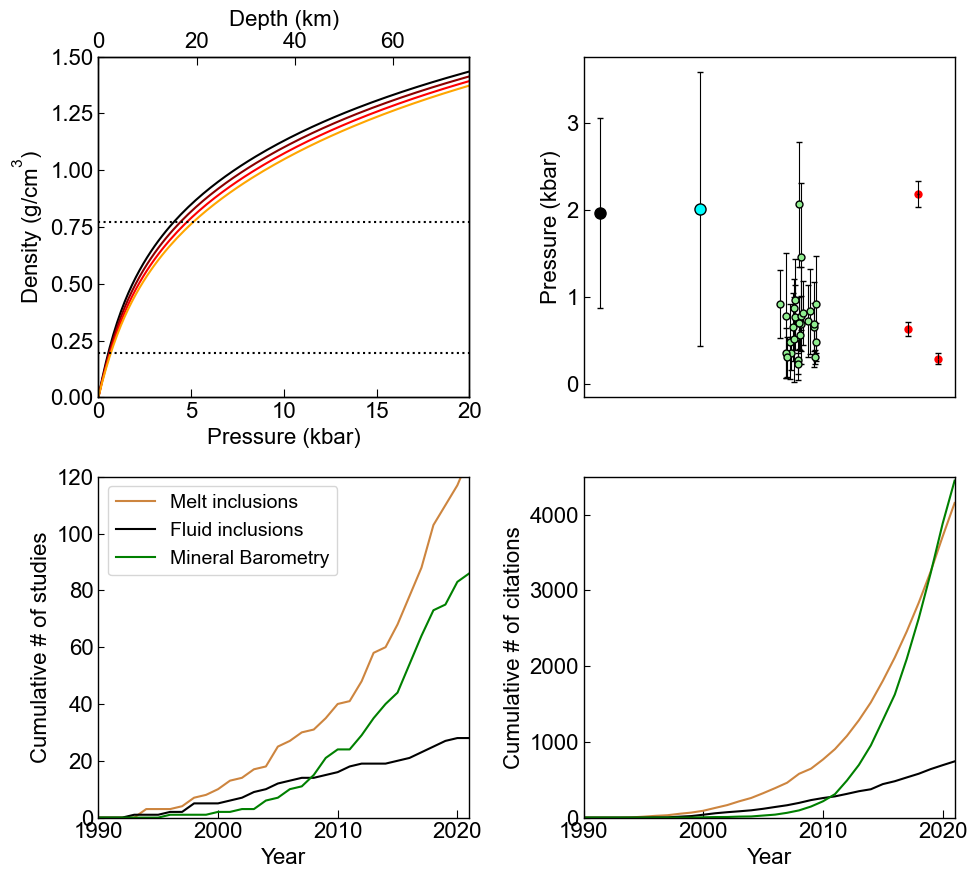

In [29]:
fig, ((ax4, ax3), (ax1, ax2)) = plt.subplots(2, 2, figsize=(10,9))

# ax1.hist(Data_Barometry['Publication Year']+0.375, bins=bins_lin_Bar+0.5+0.375, rwidth=0.25,  fc='green', label='Min-Melt')
# ax1.hist(Data_FIs['Publication Year']+0.125, bins=bins_lin_FIs+0.5+0.125, rwidth=0.25,  fc='k', label='FIs')
# ax1.hist(Data_MIs['Publication Year']+0.625, bins=bins_lin_MIs+0.5+0.625, rwidth=0.25,  fc='peru', label='MIs', alpha=0.8)
ax1.plot(Dates, Cum_Sum_Study_MI, '-', color='peru', label='Melt inclusions')
ax1.plot(Dates, Cum_Sum_Study_FI, '-k', label='Fluid inclusions')
ax1.plot(Dates, Cum_Sum_Study_Bar, '-g', label='Mineral Barometry')

ax2.plot(Dates, Cum_Sum_Cite_MI, '-', color='peru')
ax2.plot(Dates, Cum_Sum_Cite_FI, '-k')
ax2.plot(Dates, Cum_Sum_Cite_Bar, '-g')



#############
ax3.errorbar(0,
             1.9706891851560804,
             yerr=1.0936611113123715,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k',  capsize=2)
ax3.plot(0,
             1.9706891851560804,
             'ok', mfc='k', ms=8)

ax3.errorbar(1,
             2.017065765896709,
             yerr=1.5744390920895586,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k', capsize=2, zorder=0)
ax3.plot(1,
             2.017065765896709,
             'ok', mfc='cyan', ms=8)

for i in range(0, len(f8_depth)):
    rand=np.random.normal(0, 0.1, 1)
    ax3.plot(f8_depth[i]*0+2+rand, f8_depth[i], 'ok', mfc='lightgreen', ms=5)
    ax3.errorbar(f8_depth[i]*0+2+rand,
             f8_depth[i],
             yerr=F8_err[i],
             fmt='.', ecolor='k', elinewidth=0.8, mfc='red', ms=1, mec='k', capsize=2, zorder=0)
 

# plt.plot(2,
#              np.mean(CalcP_MC_08),
#              'ok')
# plt.errorbar(2,
#              np.mean(CalcP_MC_08),
#              yerr=np.std(CalcP_MC_08),
#              fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k')
ax3.plot(3.2,
             np.mean(CalcP_MC_05),
             'o', mec='None', mfc='red', ms=6, zorder=0)
ax3.errorbar(3.2,
             np.mean(CalcP_MC_05),
             yerr=np.std(CalcP_MC_05),
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k', capsize=2)

ax3.plot(3.1,
             np.mean(CalcP_MC_02),
              'o', mec='None', mfc='red', ms=6, zorder=0)
ax3.errorbar(3.1,
             np.mean(CalcP_MC_02),
             yerr=np.std(CalcP_MC_02),
             fmt='.', ecolor='k', elinewidth=0.8, mfc='yellow', ms=0.5, mec='None', capsize=2)
ax3.plot(3.4,
             np.mean(CalcP_MC_01),
             'o', mec='None', mfc='red', ms=6, zorder=0)
ax3.errorbar(3.4,
             np.mean(CalcP_MC_01),
             yerr=np.std(CalcP_MC_01),
             fmt='.', ecolor='k', elinewidth=0.8, mfc='red', ms=1, mec='None', capsize=2)
   
ax3.set_xticks([])
ax3.set_ylabel('Pressure (kbar)')


ax1.set_ylabel('Cumulative # of studies')
ax2.set_ylabel('Cumulative # of citations')

ax1.set_xlabel('Year')
ax2.set_xlabel('Year')

ax1.set_ylim([0, 120])
ax2.set_ylim([0, 4500])
ax1.set_xlim([1990, 2021])
ax2.set_xlim([1990, 2021])
ax1.legend()



ax5 = ax4.twiny()
ax4.plot(P_combo*10**(-8), CalcD_P_1000/1000, '-', color='black')
ax4.plot(P_combo*10**(-8), CalcD_P_1100/1000, '-', color='darkred')
ax4.plot(P_combo*10**(-8), CalcD_P_1200/1000, '-', color='red')
ax4.plot(P_combo*10**(-8), CalcD_P_1300/1000, '-', color='orange')

# Charlotts calculations At 20C: V=0.194 L=0.773
ax4.plot( [0, 20], [0.194, 0.194], ':k')
ax4.plot([0, 20],[0.773, 0.773],  ':k')
ax4.set_xlim([P_axis_min, P_axis_max])
ax4.set_ylim([0, 1.5])

ax5.set_xlim([D_axis_min, D_axis_max])
ax4.set_ylabel('Density (g/cm$^{3}$)')
ax5.set_xlabel('Depth (km)')
ax4.set_xlabel('Pressure (kbar)')


plt.tight_layout()
fig.savefig('Combo_for_review.png', dpi=300)